<a href="https://colab.research.google.com/github/andilugo/-Extraccion-de-caracteristicas/blob/main/Act_Extracci%C3%B3n_de_Caracter%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Extacccion de características**
Andrea Cosset Hernández Lugo A01707744


In [1]:
#Instalamos librería para análisis de variables categóricas
%pip install funpymodeling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.5/215.5 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post4-py3-none-any.whl size=2973 sha256=6f6feda85ad5d86ba5469599944d94493c1e7dd66e8b5d6f36fd9f1f5bda230d
  Stored in directory: /root/.cache/pip/wheels/46/b8/69/4f7789b7d2fc0718a44cbc4ae5d40970a40c22c472ae50f0a1
Successfully built sklearn
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


In [2]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
from seaborn import load_dataset
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl 

In [12]:
#Carga desde un archivo .xlsx sin indice
data= pd.read_excel('microretailer_mit_lift_lab.xlsx') 

In [13]:
#Verificamos información del DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 106 entries, _record_id to 235_email
dtypes: float64(23), int64(2), object(81)
memory usage: 141.7+ KB


In [14]:
#Imprimo los primeros 5 registro del dataframe
data.head()

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),19.053536,-98.233822,Eugene’s Compostura,1 Photo,Tailor,...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),19.053561,-98.234142,Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),19.058655,-98.232300,Libélula,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),19.059293,-98.233158,Quality fix,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,"November 12, 2022",2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),19.059585,-98.233864,Artesanías Los Pinos,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN


## **Filtrar 10 columnas**

In [66]:
#ocupamos las primeras 5 más importantes y las ultimas 4 que son las que tienen valores nulos 
data2= data.iloc[:, [0, 3, 5, 6,11,12,16,103,104,105]]
data2

,_record_id,_updated_by,_latitude,_longitude,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,104_how_many_shelves_does_the_micro_retailer_have,319_shopkeepers_last_name,236_whatsapp,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,Salomon Abdala Perez,19.053536,-98.233822,no,no,4,NaN,NaN,NaN
1,c596412f-4fc2-4983-acba-d9565859e42f,Salomon Abdala Perez,19.053561,-98.234142,yes,yes,8,NaN,NaN,NaN
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,Salomon Abdala Perez,19.058655,-98.232300,no,no,24,NaN,NaN,NaN
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,Salomon Abdala Perez,19.059293,-98.233158,no,no,2,NaN,NaN,NaN
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,Salomon Abdala Perez,19.059585,-98.233864,no,no,16,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
166,2413f06e-15cc-4a6f-8e83-5224c6824b12,Emilio Garza,19.043115,-98.194066,no,no,5,NaN,NaN,NaN
167,962bf5a6-1eff-4874-a627-9cd8e3ca27b4,Emilio Garza,19.042794,-98.193802,no,no,5,NaN,NaN,NaN
168,9ff658db-4dc5-48b6-aa0b-5c6668bb6720,Emilio Garza,19.042809,-98.193439,no,yes,1,NaN,NaN,NaN
169,e88aa9c1-dc8b-4180-99a1-2e0118ad905d,Francisco Adán,19.042558,-98.193818,no,yes,1,NaN,NaN,NaN


##Valores nulos

In [67]:
#Identificar los valores nulos por columna 
valores_nulos= data2.isnull().sum()
valores_nulos

_record_id                                                 0
_updated_by                                                0
_latitude                                                  0
_longitude                                                 0
99_does_the_micro_retailer_exhibits_products_outside_      0
102_does_the_micro_retailer_sells_fresh_products_          0
104_how_many_shelves_does_the_micro_retailer_have          0
319_shopkeepers_last_name                                125
236_whatsapp                                             129
235_email                                                142
dtype: int64

In [68]:
data2.fillna(0)
data2

,_record_id,_updated_by,_latitude,_longitude,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,104_how_many_shelves_does_the_micro_retailer_have,319_shopkeepers_last_name,236_whatsapp,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,Salomon Abdala Perez,19.053536,-98.233822,no,no,4,NaN,NaN,NaN
1,c596412f-4fc2-4983-acba-d9565859e42f,Salomon Abdala Perez,19.053561,-98.234142,yes,yes,8,NaN,NaN,NaN
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,Salomon Abdala Perez,19.058655,-98.232300,no,no,24,NaN,NaN,NaN
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,Salomon Abdala Perez,19.059293,-98.233158,no,no,2,NaN,NaN,NaN
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,Salomon Abdala Perez,19.059585,-98.233864,no,no,16,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
166,2413f06e-15cc-4a6f-8e83-5224c6824b12,Emilio Garza,19.043115,-98.194066,no,no,5,NaN,NaN,NaN
167,962bf5a6-1eff-4874-a627-9cd8e3ca27b4,Emilio Garza,19.042794,-98.193802,no,no,5,NaN,NaN,NaN
168,9ff658db-4dc5-48b6-aa0b-5c6668bb6720,Emilio Garza,19.042809,-98.193439,no,yes,1,NaN,NaN,NaN
169,e88aa9c1-dc8b-4180-99a1-2e0118ad905d,Francisco Adán,19.042558,-98.193818,no,yes,1,NaN,NaN,NaN


In [69]:
#Verificamos que no haya  valores nulos 
valores_nulos= data2.isnull().sum()
valores_nulos

_record_id                                                 0
_updated_by                                                0
_latitude                                                  0
_longitude                                                 0
99_does_the_micro_retailer_exhibits_products_outside_      0
102_does_the_micro_retailer_sells_fresh_products_          0
104_how_many_shelves_does_the_micro_retailer_have          0
319_shopkeepers_last_name                                125
236_whatsapp                                             129
235_email                                                142
dtype: int64

#Metodo de desviacion estandar

In [70]:
data2

,_record_id,_updated_by,_latitude,_longitude,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,104_how_many_shelves_does_the_micro_retailer_have,319_shopkeepers_last_name,236_whatsapp,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,Salomon Abdala Perez,19.053536,-98.233822,no,no,4,NaN,NaN,NaN
1,c596412f-4fc2-4983-acba-d9565859e42f,Salomon Abdala Perez,19.053561,-98.234142,yes,yes,8,NaN,NaN,NaN
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,Salomon Abdala Perez,19.058655,-98.232300,no,no,24,NaN,NaN,NaN
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,Salomon Abdala Perez,19.059293,-98.233158,no,no,2,NaN,NaN,NaN
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,Salomon Abdala Perez,19.059585,-98.233864,no,no,16,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
166,2413f06e-15cc-4a6f-8e83-5224c6824b12,Emilio Garza,19.043115,-98.194066,no,no,5,NaN,NaN,NaN
167,962bf5a6-1eff-4874-a627-9cd8e3ca27b4,Emilio Garza,19.042794,-98.193802,no,no,5,NaN,NaN,NaN
168,9ff658db-4dc5-48b6-aa0b-5c6668bb6720,Emilio Garza,19.042809,-98.193439,no,yes,1,NaN,NaN,NaN
169,e88aa9c1-dc8b-4180-99a1-2e0118ad905d,Francisco Adán,19.042558,-98.193818,no,yes,1,NaN,NaN,NaN


In [72]:
cuanti_data=data2.drop(['_record_id',	'_updated_by', '102_does_the_micro_retailer_sells_fresh_products_','99_does_the_micro_retailer_exhibits_products_outside_',	'319_shopkeepers_last_name',	'99_does_the_micro_retailer_exhibits_products_outside_','236_whatsapp',	'235_email'], axis=1)
cuanti_data

,_latitude,_longitude,104_how_many_shelves_does_the_micro_retailer_have
0,19.053536,-98.233822,4
1,19.053561,-98.234142,8
2,19.058655,-98.232300,24
3,19.059293,-98.233158,2
4,19.059585,-98.233864,16
...,...,...,...
166,19.043115,-98.194066,5
167,19.042794,-98.193802,5
168,19.042809,-98.193439,1
169,19.042558,-98.193818,1


In [73]:
cuali_data=data2.drop(['_latitude'	,'_longitude', '104_how_many_shelves_does_the_micro_retailer_have'], axis=1)
cuali_data

,_record_id,_updated_by,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,319_shopkeepers_last_name,236_whatsapp,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,Salomon Abdala Perez,no,no,NaN,NaN,NaN
1,c596412f-4fc2-4983-acba-d9565859e42f,Salomon Abdala Perez,yes,yes,NaN,NaN,NaN
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,Salomon Abdala Perez,no,no,NaN,NaN,NaN
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,Salomon Abdala Perez,no,no,NaN,NaN,NaN
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,Salomon Abdala Perez,no,no,NaN,NaN,NaN
...,...,...,...,...,...,...,...
166,2413f06e-15cc-4a6f-8e83-5224c6824b12,Emilio Garza,no,no,NaN,NaN,NaN
167,962bf5a6-1eff-4874-a627-9cd8e3ca27b4,Emilio Garza,no,no,NaN,NaN,NaN
168,9ff658db-4dc5-48b6-aa0b-5c6668bb6720,Emilio Garza,no,yes,NaN,NaN,NaN
169,e88aa9c1-dc8b-4180-99a1-2e0118ad905d,Francisco Adán,no,yes,NaN,NaN,NaN


In [74]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=cuanti_data
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido _latitude                                            19.111172
_longitude                                          -98.090304
104_how_many_shelves_does_the_micro_retailer_have    55.812917
dtype: float64
Limite inferior permitido _latitude                                            18.979439
_longitude                                          -98.347635
104_how_many_shelves_does_the_micro_retailer_have   -42.397712
dtype: float64


In [75]:
#Encontramos Outliers del Dataframe
outliers= cuanti_data[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,_latitude,_longitude,104_how_many_shelves_does_the_micro_retailer_have
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
166,NaN,NaN,NaN
167,NaN,NaN,NaN
168,NaN,NaN,NaN
169,NaN,NaN,NaN


In [76]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
data3= cuanti_data[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data3

,_latitude,_longitude,104_how_many_shelves_does_the_micro_retailer_have
0,19.053536,-98.233822,4.0
1,19.053561,-98.234142,8.0
2,19.058655,-98.232300,24.0
3,19.059293,-98.233158,2.0
4,19.059585,-98.233864,16.0
...,...,...,...
166,19.043115,-98.194066,5.0
167,19.042794,-98.193802,5.0
168,19.042809,-98.193439,1.0
169,19.042558,-98.193818,1.0


In [77]:
#Corroboramos valores nulos del dataframe4
valores_nulos=cuanti_data.isnull().sum()
valores_nulos

_latitude                                            0
_longitude                                           0
104_how_many_shelves_does_the_micro_retailer_have    0
dtype: int64

In [78]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean=cuanti_data.copy()
data_clean=data_clean.fillna(round(cuanti_data.mean(),1))
data_clean

,_latitude,_longitude,104_how_many_shelves_does_the_micro_retailer_have
0,19.053536,-98.233822,4
1,19.053561,-98.234142,8
2,19.058655,-98.232300,24
3,19.059293,-98.233158,2
4,19.059585,-98.233864,16
...,...,...,...
166,19.043115,-98.194066,5
167,19.042794,-98.193802,5
168,19.042809,-98.193439,1
169,19.042558,-98.193818,1


In [79]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_clean.isnull().sum()
valores_nulos

_latitude                                            0
_longitude                                           0
104_how_many_shelves_does_the_micro_retailer_have    0
dtype: int64

In [80]:
# Unimos los datas con el dataframe
limpios_desv = pd.concat([cuanti_data,cuali_data], axis=1)
limpios_desv

,_latitude,_longitude,104_how_many_shelves_does_the_micro_retailer_have,_record_id,_updated_by,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,319_shopkeepers_last_name,236_whatsapp,235_email
0,19.053536,-98.233822,4,dff2998e-af74-4de6-8efd-488aca24e67b,Salomon Abdala Perez,no,no,NaN,NaN,NaN
1,19.053561,-98.234142,8,c596412f-4fc2-4983-acba-d9565859e42f,Salomon Abdala Perez,yes,yes,NaN,NaN,NaN
2,19.058655,-98.232300,24,5bb632b3-41b5-4fb6-a817-b564e8b45a48,Salomon Abdala Perez,no,no,NaN,NaN,NaN
3,19.059293,-98.233158,2,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,Salomon Abdala Perez,no,no,NaN,NaN,NaN
4,19.059585,-98.233864,16,6cc637fa-3d54-48c7-9499-6de13d0a26aa,Salomon Abdala Perez,no,no,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
166,19.043115,-98.194066,5,2413f06e-15cc-4a6f-8e83-5224c6824b12,Emilio Garza,no,no,NaN,NaN,NaN
167,19.042794,-98.193802,5,962bf5a6-1eff-4874-a627-9cd8e3ca27b4,Emilio Garza,no,no,NaN,NaN,NaN
168,19.042809,-98.193439,1,9ff658db-4dc5-48b6-aa0b-5c6668bb6720,Emilio Garza,no,yes,NaN,NaN,NaN
169,19.042558,-98.193818,1,e88aa9c1-dc8b-4180-99a1-2e0118ad905d,Francisco Adán,no,yes,NaN,NaN,NaN


In [81]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=limpios_desv.isnull().sum()
valores_nulos

_latitude                                                  0
_longitude                                                 0
104_how_many_shelves_does_the_micro_retailer_have          0
_record_id                                                 0
_updated_by                                                0
99_does_the_micro_retailer_exhibits_products_outside_      0
102_does_the_micro_retailer_sells_fresh_products_          0
319_shopkeepers_last_name                                125
236_whatsapp                                             129
235_email                                                142
dtype: int64

##PROCEDIMIENTO CUANTILES PARA SUSTITUIR OUTLIERS EN DATAFRAME

In [82]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=cuanti_data

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido _latitude                                            19.138774
_longitude                                          -98.075320
104_how_many_shelves_does_the_micro_retailer_have    16.000000
dtype: float64
Limite inferior permitido _latitude                                            18.950047
_longitude                                          -98.355995
104_how_many_shelves_does_the_micro_retailer_have    -8.000000
dtype: float64


In [83]:
#Encontramos Outliers del Dataframe
outliers_iqr= cuanti_data[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,_latitude,_longitude,104_how_many_shelves_does_the_micro_retailer_have
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,24.0
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
166,NaN,NaN,NaN
167,NaN,NaN,NaN
168,NaN,NaN,NaN
169,NaN,NaN,NaN


In [84]:
#Obtenemos datos limpios del Dataframe
data3_iqr= cuanti_data[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

,_latitude,_longitude,104_how_many_shelves_does_the_micro_retailer_have
0,19.053536,-98.233822,4.0
1,19.053561,-98.234142,8.0
2,19.058655,-98.232300,NaN
3,19.059293,-98.233158,2.0
4,19.059585,-98.233864,16.0
...,...,...,...
166,19.043115,-98.194066,5.0
167,19.042794,-98.193802,5.0
168,19.042809,-98.193439,1.0
169,19.042558,-98.193818,1.0


In [85]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=cuanti_data.isnull().sum()
valores_nulos

_latitude                                            0
_longitude                                           0
104_how_many_shelves_does_the_micro_retailer_have    0
dtype: int64

In [86]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data5_iqr=cuanti_data.copy()
data5_iqr=data5_iqr.fillna(round(cuanti_data.mean(),1))
data5_iqr

,_latitude,_longitude,104_how_many_shelves_does_the_micro_retailer_have
0,19.053536,-98.233822,4
1,19.053561,-98.234142,8
2,19.058655,-98.232300,24
3,19.059293,-98.233158,2
4,19.059585,-98.233864,16
...,...,...,...
166,19.043115,-98.194066,5
167,19.042794,-98.193802,5
168,19.042809,-98.193439,1
169,19.042558,-98.193818,1


In [87]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data6_iqr=cuali_data.copy()
data6_iqr=data5_iqr.fillna(round(cuali_data.mean()))
data6_iqr

<ipython-input-87-b6d9ae93b2ff>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data6_iqr=data5_iqr.fillna(round(cuali_data.mean()))


,_latitude,_longitude,104_how_many_shelves_does_the_micro_retailer_have
0,19.053536,-98.233822,4
1,19.053561,-98.234142,8
2,19.058655,-98.232300,24
3,19.059293,-98.233158,2
4,19.059585,-98.233864,16
...,...,...,...
166,19.043115,-98.194066,5
167,19.042794,-98.193802,5
168,19.042809,-98.193439,1
169,19.042558,-98.193818,1


In [88]:
# Unimos los datas con el dataframe
limpios_iqr = pd.concat([cuanti_data, cuali_data], axis=1)
limpios_iqr

,_latitude,_longitude,104_how_many_shelves_does_the_micro_retailer_have,_record_id,_updated_by,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,319_shopkeepers_last_name,236_whatsapp,235_email
0,19.053536,-98.233822,4,dff2998e-af74-4de6-8efd-488aca24e67b,Salomon Abdala Perez,no,no,NaN,NaN,NaN
1,19.053561,-98.234142,8,c596412f-4fc2-4983-acba-d9565859e42f,Salomon Abdala Perez,yes,yes,NaN,NaN,NaN
2,19.058655,-98.232300,24,5bb632b3-41b5-4fb6-a817-b564e8b45a48,Salomon Abdala Perez,no,no,NaN,NaN,NaN
3,19.059293,-98.233158,2,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,Salomon Abdala Perez,no,no,NaN,NaN,NaN
4,19.059585,-98.233864,16,6cc637fa-3d54-48c7-9499-6de13d0a26aa,Salomon Abdala Perez,no,no,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
166,19.043115,-98.194066,5,2413f06e-15cc-4a6f-8e83-5224c6824b12,Emilio Garza,no,no,NaN,NaN,NaN
167,19.042794,-98.193802,5,962bf5a6-1eff-4874-a627-9cd8e3ca27b4,Emilio Garza,no,no,NaN,NaN,NaN
168,19.042809,-98.193439,1,9ff658db-4dc5-48b6-aa0b-5c6668bb6720,Emilio Garza,no,yes,NaN,NaN,NaN
169,19.042558,-98.193818,1,e88aa9c1-dc8b-4180-99a1-2e0118ad905d,Francisco Adán,no,yes,NaN,NaN,NaN


In [89]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=limpios_iqr.isnull().sum()
valores_nulos

_latitude                                                  0
_longitude                                                 0
104_how_many_shelves_does_the_micro_retailer_have          0
_record_id                                                 0
_updated_by                                                0
99_does_the_micro_retailer_exhibits_products_outside_      0
102_does_the_micro_retailer_sells_fresh_products_          0
319_shopkeepers_last_name                                125
236_whatsapp                                             129
235_email                                                142
dtype: int64

##Extraccion de caracteristicas 

In [90]:
#Obtengo un análisis univariado de las variables categóricas
freq_tbl(data2)

                               _record_id  frequency  percentage  \
0    dff2998e-af74-4de6-8efd-488aca24e67b          1    0.005848   
1    53c25f08-1c1b-4c1c-97d5-b45c940735cc          1    0.005848   
2    af5c48b5-a916-47a6-aacc-1128ea1e728e          1    0.005848   
3    4790411b-df1d-44f0-a659-6d99e26ae765          1    0.005848   
4    e70db20a-25db-412b-9a71-7df285c92a3d          1    0.005848   
..                                    ...        ...         ...   
166  75bcc709-90ff-4db7-bb82-293f2f72f3ae          1    0.005848   
167  bd59c8b6-81cb-4698-8cfd-dbab7f01ef21          1    0.005848   
168  94b1c6bc-1fb8-4895-aacc-c2604dc12b93          1    0.005848   
169  d9ff4194-657e-4fb4-b5f4-b7e8b350a646          1    0.005848   
170  bf720ff0-3b7d-47ed-ba49-f5d4bfb7293c          1    0.005848   

     cumulative_perc  
0           0.005848  
1           0.011696  
2           0.017544  
3           0.023392  
4           0.029240  
..               ...  
166         0.976608  

In [91]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(data2['102_does_the_micro_retailer_sells_fresh_products_'])
table1

,102_does_the_micro_retailer_sells_fresh_products_,frequency,percentage,cumulative_perc
0,no,105,0.614035,0.614035
1,yes,66,0.385965,1.000000


In [92]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table1[table1['frequency']>1]
Filtro

,102_does_the_micro_retailer_sells_fresh_products_,frequency,percentage,cumulative_perc
0,no,105,0.614035,0.614035
1,yes,66,0.385965,1.000000


In [93]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('102_does_the_micro_retailer_sells_fresh_products_')
Filtro_index

,frequency,percentage,cumulative_perc
102_does_the_micro_retailer_sells_fresh_products_,,,
no,105,0.614035,0.614035
yes,66,0.385965,1.000000


Text(0, 0.5, 'Frecuencia')

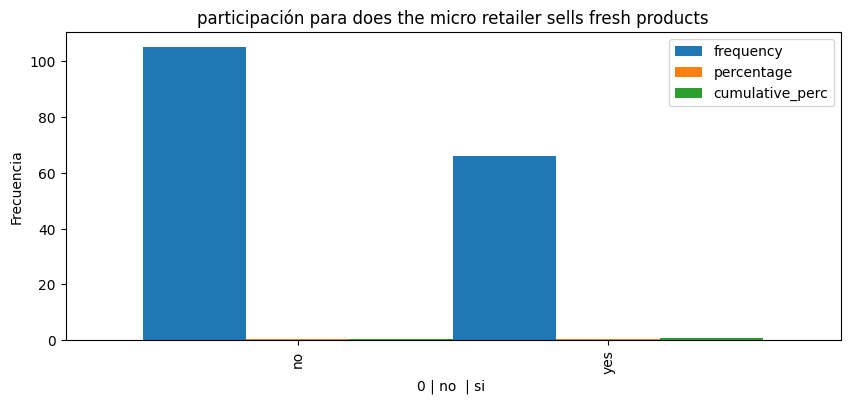

In [95]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('participación para does the micro retailer sells fresh products')
plt.xlabel('0 | no  | si ')
plt.ylabel('Frecuencia')

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

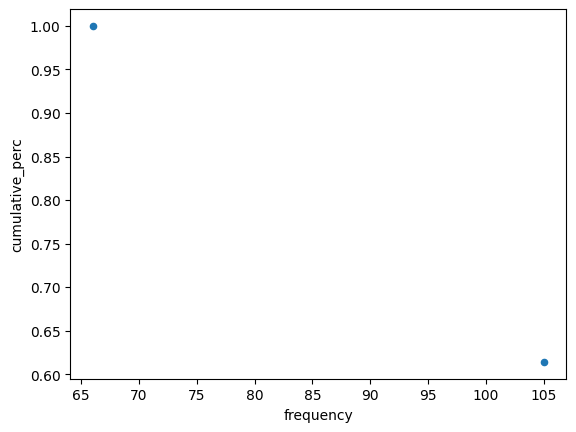

In [96]:
#Realizamos grafico de dispersión del dataframe filtrado
Filtro_index.plot("frequency", "cumulative_perc", kind="scatter")

<Axes: xlabel='102_does_the_micro_retailer_sells_fresh_products_'>

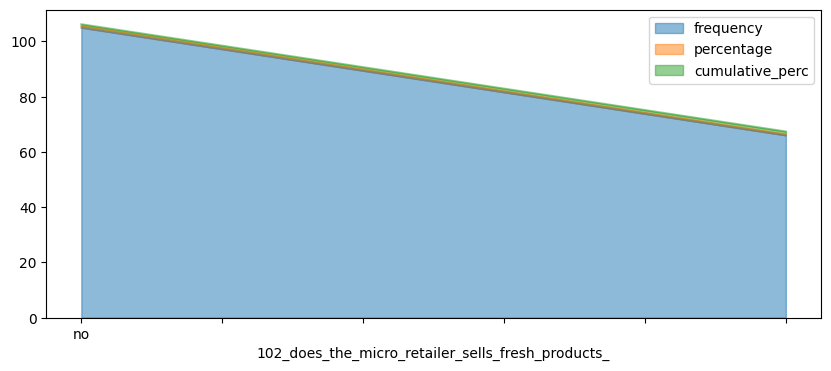

In [97]:
#Realizamos grafico de área del dataframe filtrado
Filtro_index.plot(kind='area', figsize=(10,4),alpha = 0.5)

<Axes: ylabel='frequency'>

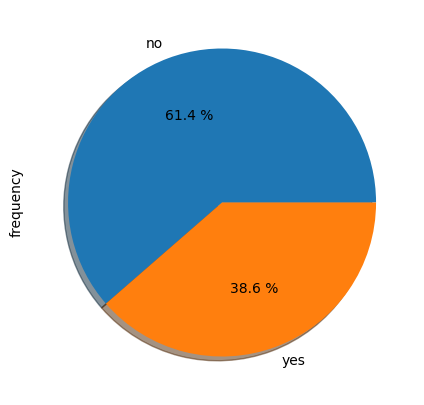

In [98]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

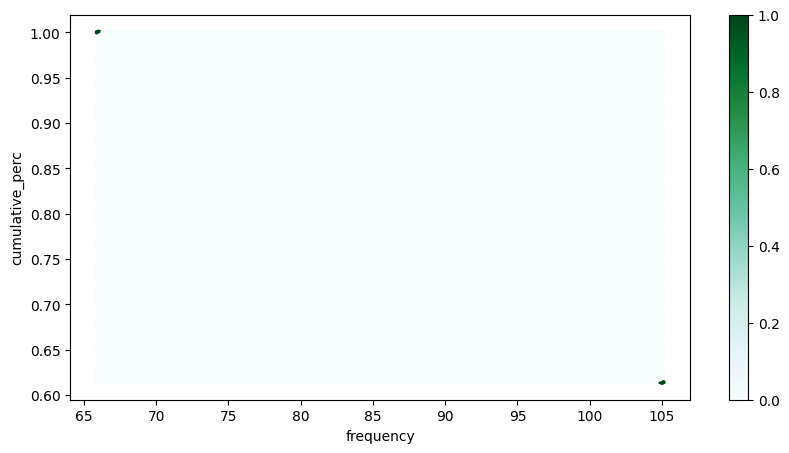

In [99]:
#Realizamos grafico hexagonal del dataframe filtrado, alternativo al scatter plot
Filtro_index.plot.hexbin("frequency", "cumulative_perc", figsize=(10,5))